#### Lybraries and plots settings

In [2]:
#Lybraries
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import pandas as pd
import gc

In [3]:
#settings for plots

#tableau for plots
plt.style.use('tableau-colorblind10')

plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 16        # Default font size for text
plt.rcParams['axes.titlesize'] = 16   # Font size for axes titles
plt.rcParams['axes.labelsize'] = 16   # Font size for x and y labels
plt.rcParams['xtick.labelsize'] = 16  # Font size for x tick labels
plt.rcParams['ytick.labelsize'] = 16  # Font size for y tick labels

#### Selecting forlder with data to analyze

In [12]:
DATA = 2    # 1 or 2 for different simulation runs

In [13]:
#folders and files
if DATA == 1:
    folder = 'placeholder/simulations/'
elif DATA == 2:
    folder = 'placeholder/simulations/'
    
files = os.listdir(folder)

In [14]:
files[:5]

['sim_data_s-1_g0_n0.npz',
 'sim_data_s-1_g3_n1.npz',
 'sim_data_s0_g3_n4.npz',
 'sim_data_s0_g0_n1.npz',
 'sim_data_s-1_g3_n4.npz']

## Plots of the simulations

#### Hyperparameters

In [15]:
if DATA == 1:
    
    #hyperparameters
    N = 400
    N_steps = 61000
    N_cut = 1000
    dt = 0.05 
    tau_m = 3 #ms
    time = np.arange(0,N_steps*dt,dt)*tau_m
    n_bins = 20

    mu = 0.6
    sigma = 0.6

elif DATA == 2:

    #hyperparameters
    N = 400
    N_steps = 20000
    N_cut = 500
    dt = 0.1
    tau_m = 3 #ms
    time = np.arange(0,N_steps*dt,dt)*tau_m
    n_bins = 20

    mu = 0.6
    sigma = 0.6

### Plot of a Sample Simulation

In [16]:
files

['sim_data_s-1_g0_n0.npz',
 'sim_data_s-1_g3_n1.npz',
 'sim_data_s0_g3_n4.npz',
 'sim_data_s0_g0_n1.npz',
 'sim_data_s-1_g3_n4.npz',
 'sim_data_s0_g3_n0.npz',
 'sim_data_s0_g0_n0.npz',
 'sim_data_s2_g0_n4.npz',
 'sim_data_s-1_g1_n3.npz',
 'sim_data_s0_g1_n2.npz',
 'sim_data_s1_g0_n0.npz',
 'sim_data_s2_g0_n1.npz',
 'sim_data_s1_g2_n3.npz',
 'sim_data_s0_g3_n2.npz',
 'sim_data_s1_g3_n1.npz',
 'sim_data_s0_g3_n3.npz',
 'sim_data_s-1_g3_n2.npz',
 'sim_data_s-1_g3_n3.npz',
 'sim_data_s0_g0_n3.npz',
 'sim_data_s0_g3_n1.npz',
 'sim_data_s0_g0_n2.npz',
 'sim_data_s1_g3_n0.npz',
 'sim_data_s1_g0_n1.npz',
 'sim_data_s-1_g2_n1.npz',
 'sim_data_s1_g2_n4.npz',
 'sim_data_s-1_g0_n3.npz',
 'sim_data_s-1_g0_n1.npz',
 'sim_data_s-1_g0_n2.npz',
 'sim_data_s-1_g0_n4.npz',
 'sim_data_s2_g0_n0.npz',
 'sim_data_s0_g1_n0.npz',
 'sim_data_s1_g3_n2.npz',
 'sim_data_s1_g0_n2.npz',
 'sim_data_s1_g0_n4.npz',
 'sim_data_s1_g0_n3.npz',
 'sim_data_s1_g3_n4.npz',
 'sim_data_s0_g0_n4.npz',
 'sim_data_s0_g2_n0.npz',
 

In [79]:
file = files[224]
file

'sim_s_dist_heterogeneous_mu0.6_sigma0.6_meanNone_g2.6_n7_index223.npz'

In [33]:
file = 'sim_data_s0_g1_n0.npz'

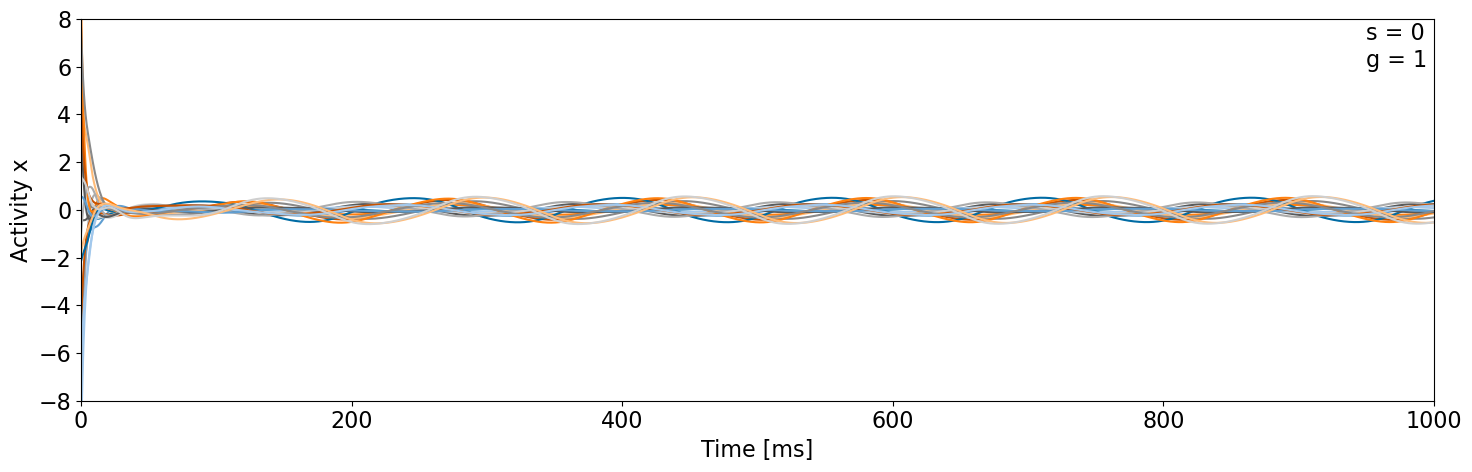

In [34]:
data = np.load(folder+file)
sim = data['sim']

samples = np.random.choice(N, 20, replace=False)
    
#Plot of the simulation
plt.figure(figsize=(15,5))
plt.plot(time, sim[samples, :].T)
plt.xlim((0, 1000))
plt.ylim((-8, 8))
plt.text(950,  6, 's = 0\ng = 1')
plt.xlabel('Time [ms]')
plt.ylabel('Activity x')
plt.savefig('final_results/simulations/'+file.split('.npz')[0]+'.png')

### Plot of all simulations (long run-time)

In [8]:
#plot of simulations
for file in files:

    #loading data
    data = np.load(folder+'simulations/'+file)/simu
    sim = data['sim']

    samples = np.random.choice(N, 10, replace=False)
    
    #Plot of the simulation
    plt.figure(figsize=(15,5))
    plt.plot(time, sim[samples, :].T)
    plt.title(file.split('.npz')[0])
    plt.xlabel('Time [ms]')
    plt.ylabel('Activity')
    plt.savefig('final_results/simulations/'+file.split('.npz')[0]+'.png')
    plt.close()

    del data
    del sim
    gc.collect()

## $\sigma_{\tau}$ vs $g$

In [88]:
col = ['dist', 'g', 'sigma_tau']
df = pd.DataFrame(columns = col)

In [94]:
#creating a list of the ordered files to be analayzed
for file in files:
    pattern_g = r'_g(.*?)_'
    g = float(re.search(pattern_g, file).group(1))

    pattern_dist = r'dist_(.*?)_'
    dist = re.search(pattern_dist, file).group(1)
   
    tau = np.load(folder+file)['tau']*tau_m

    sigma_tau = np.std(tau)

    df.loc[len(df)] = [dist, g, sigma_tau]

In [95]:
df_plot = df.groupby(['dist', 'g']).mean('sigma_tau').reset_index()
df_plot =df_plot[df_plot['g']>0.3]

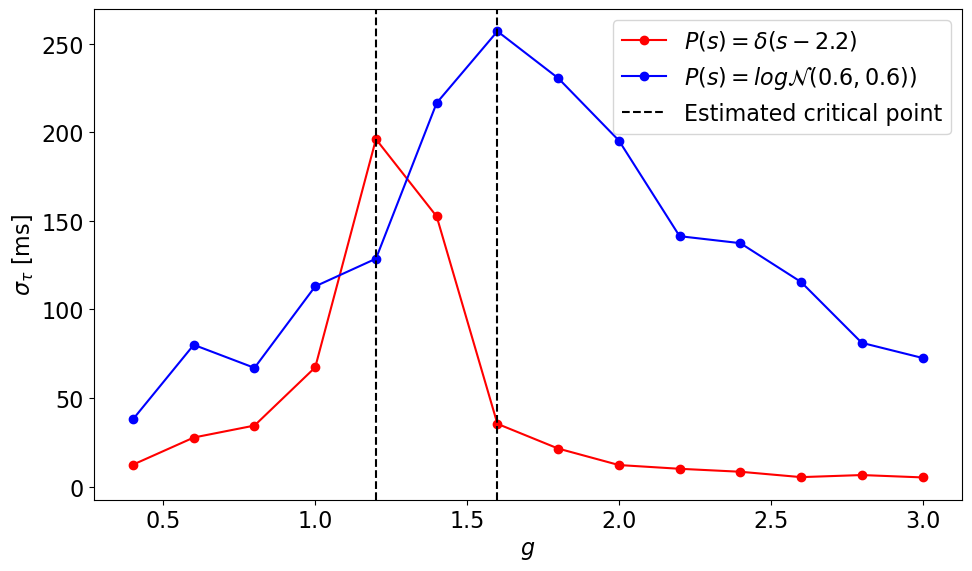

In [97]:
plt.figure(figsize=(10, 6))

plt.plot(df_plot['g'][df_plot['dist']=='homogeneous'], df_plot['sigma_tau'][df_plot['dist']=='homogeneous'], 'o-', color = 'red', label = r'$P(s)=\delta(s-2.2)$')
plt.plot(df_plot['g'][df_plot['dist']=='heterogeneous'], df_plot['sigma_tau'][df_plot['dist']=='heterogeneous'], 'o-',  color = 'blue', label = r'$P(s)=log\mathcal{N}(0.6, 0.6))$')
plt.axvline(1.2, color = 'black', linestyle = '--')
plt.axvline(1.6, color = 'black', linestyle = '--', label = 'Estimated critical point')

plt.legend()
plt.xlabel(r'$g$')
plt.ylabel(r'$\sigma_{\tau}$ [ms]')
plt.savefig('final_results/sigma_tau_vs_g.png')

## PHASE DIAGRAM

In [98]:
folder = 'data_N400_N_steps20000_N_cut500_dt0.1/'
df = pd.read_csv(folder + 'results.csv')

In [99]:
#hyperparameters
N = 400
N_rep = 5
N_steps = 20000
N_cut = 500
dt = 0.1
tau_m = 3 #ms
time = np.arange(0,N_steps*dt,dt)*tau_m
n_bins = 20

mu = 0.6
sigma = 0.6

In [100]:
g_list = [0, 1, 2, 3]
s_list = [-1, 0, 1, 2]

/tmp/ipykernel_14951/3189954719.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('final_results/phase_diagram_s_const.png',bbox_inches='tight', pad_inches=0.1)
/home/zenn/anaconda3/envs/VCS/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

/home/zenn/anaconda3/envs/VCS/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


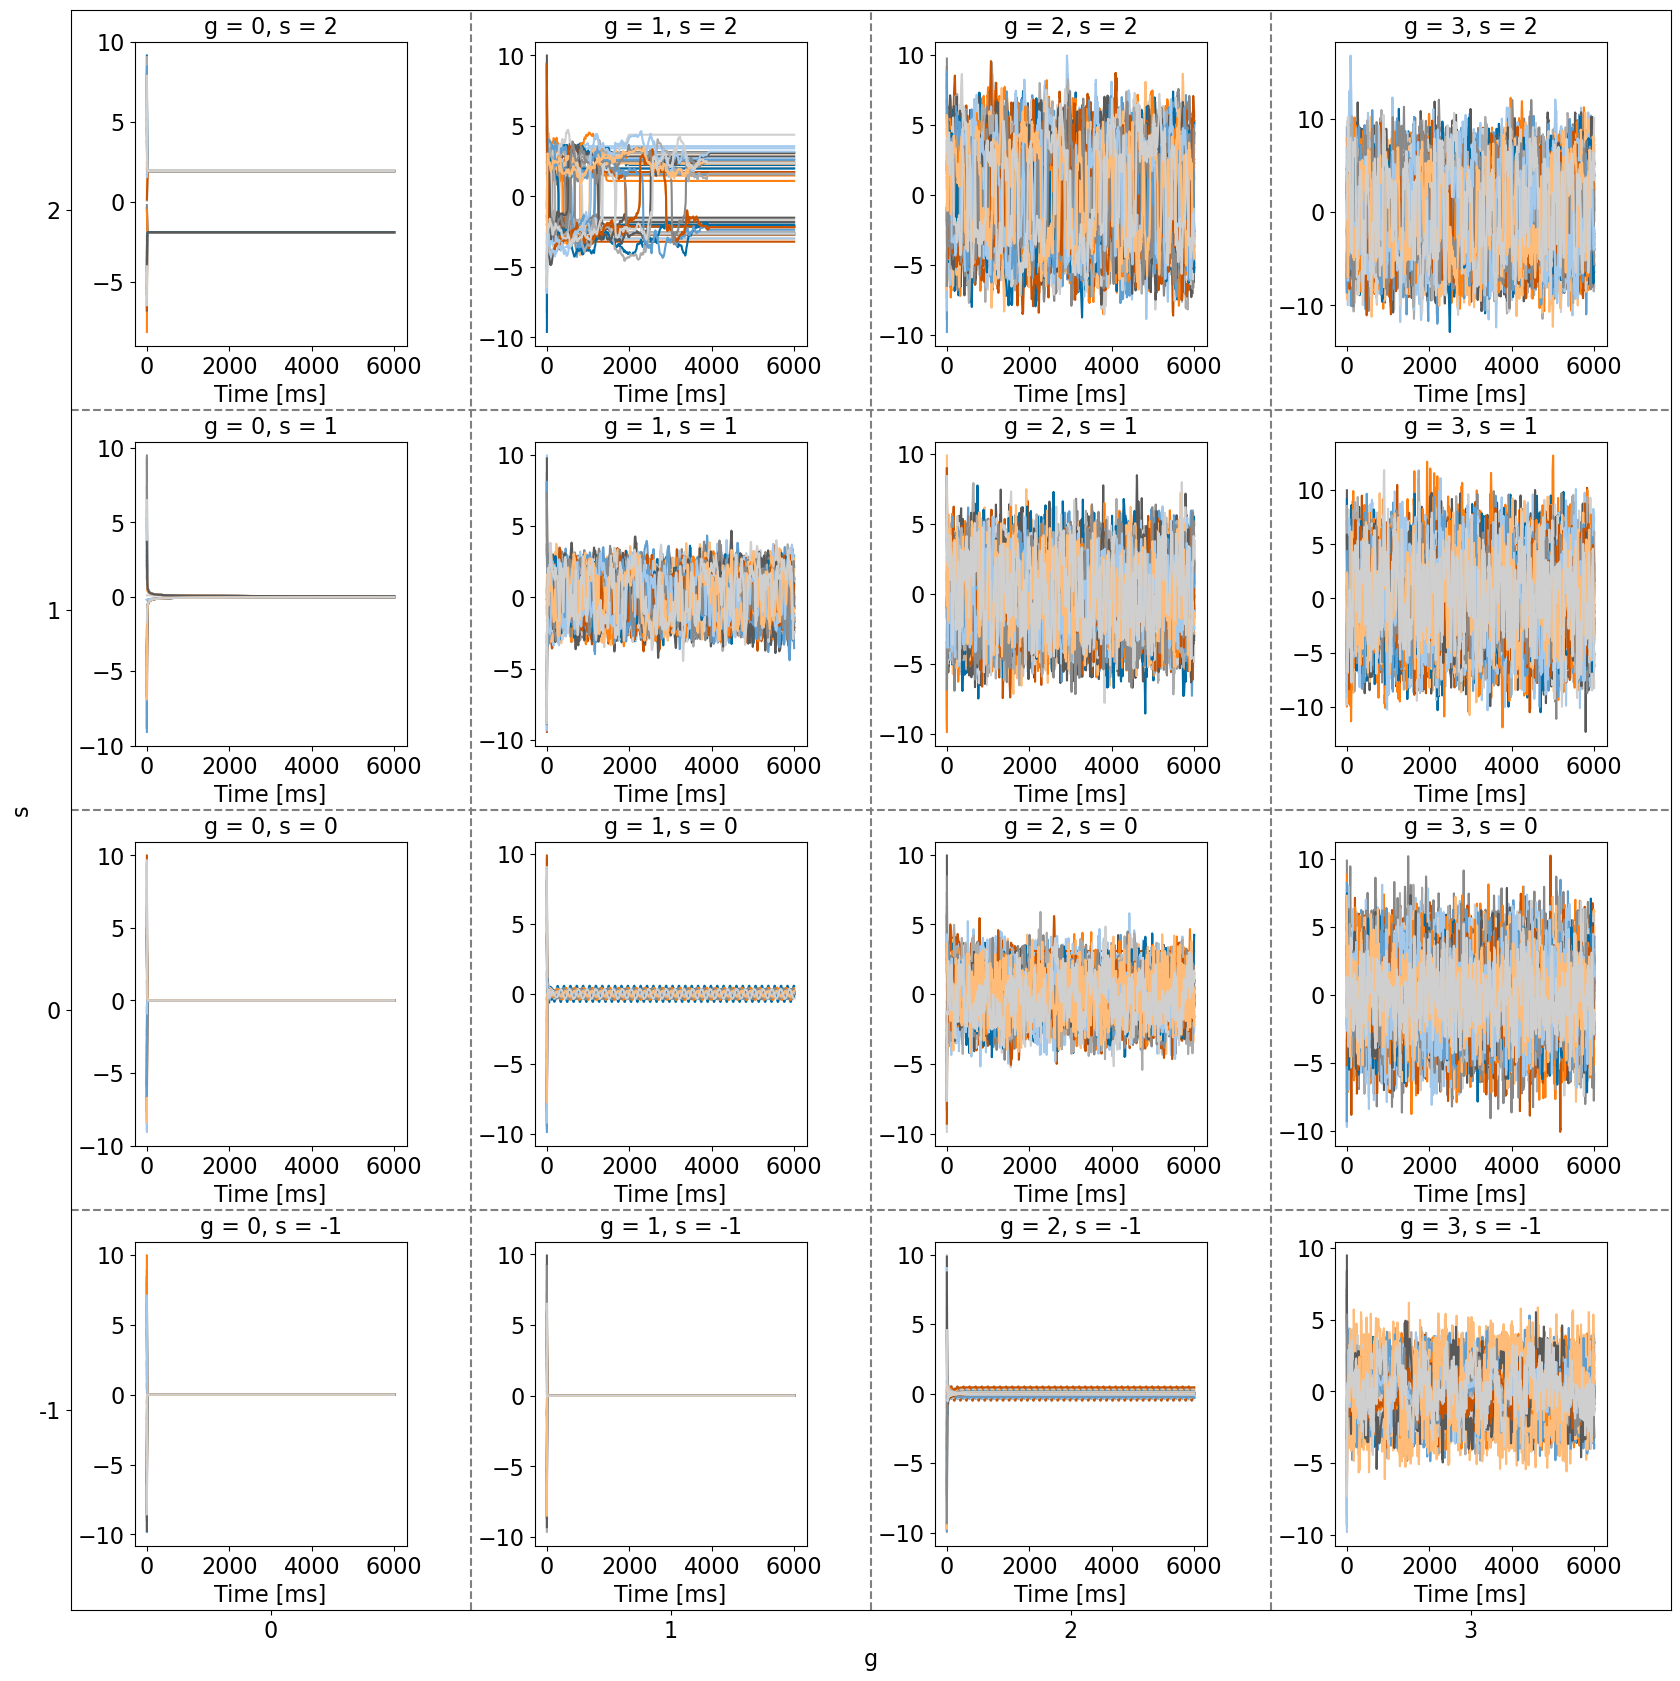

In [103]:
# Plots of the results

width = 16
height = 16
eps1 = 0.04
eps2 = 0.02

n_plot_x = len(g_list)
n_plot_y = len(s_list)

plt.tight_layout()

n_plots = len(s_list)*len(g_list)

fig = plt.figure(figsize = (width, height))


new_ax = fig.add_axes([0, 0, 1, 1])

new_ax.set_xlim([min(g_list)-(max(g_list)-min(g_list))/(len(g_list)+2), max(g_list)+(max(g_list)-min(g_list))/(len(g_list)+2)])
new_ax.set_ylim([min(s_list)-(max(s_list)-min(s_list))/(len(s_list)+2), max(s_list)+(max(s_list)-min(s_list))/(len(s_list)+2)])

new_ax.set_xticks(g_list, g_list)
new_ax.set_yticks(sorted(s_list), sorted(s_list))

new_ax.set_xlabel('g')
new_ax.set_ylabel('s')

new_ax.vlines(x=[0.5, 1.5, 2.5], ymin = -1.5, ymax = 2.5, linestyle='--', color='grey')#, , ydata = [-0.5, 0.5, 1.5])
new_ax.hlines(y=[-0.5, 0.5, 1.5], xmin = -0.5, xmax = 3.5, linestyle='--', color='grey')


#sorting the lists
g_list.sort()
s_list.sort()

#choosing interested g
for j, g in enumerate(g_list):
    for i, s in enumerate(s_list):

        tmp1 = fig.add_axes([j/n_plot_x + eps1, i/n_plot_y + eps1, 1/n_plot_x-2*eps1, 1/n_plot_y-eps1-eps2])

        avg_sigma_tau = 0

        

        for n in range(N_rep):
            
            #plot of the simulations
            file = folder + 'simulations/sim_data_s{}_g{}_n{}.npz'.format(s, g, n)
            sim = np.load(file)['sim']             
                  

            sample = np.random.choice(N, 10)
            for k in sample:
                tmp1.plot(time, sim[k, :], zorder=2)
        
        

        tmp1.set_xlabel('Time [ms]')
        tmp1.set_title(r'g = {}, s = {}'.format(g, s))
    


fig.savefig('final_results/phase_diagram_s_const.png',bbox_inches='tight', pad_inches=0.1)


### Theoretical Phase-Diagram

In [104]:
gs = np.linspace(0,3, 1000)
s1 = 1-gs
s2 = 1+ 0.157*np.log(0.443*gs+1)

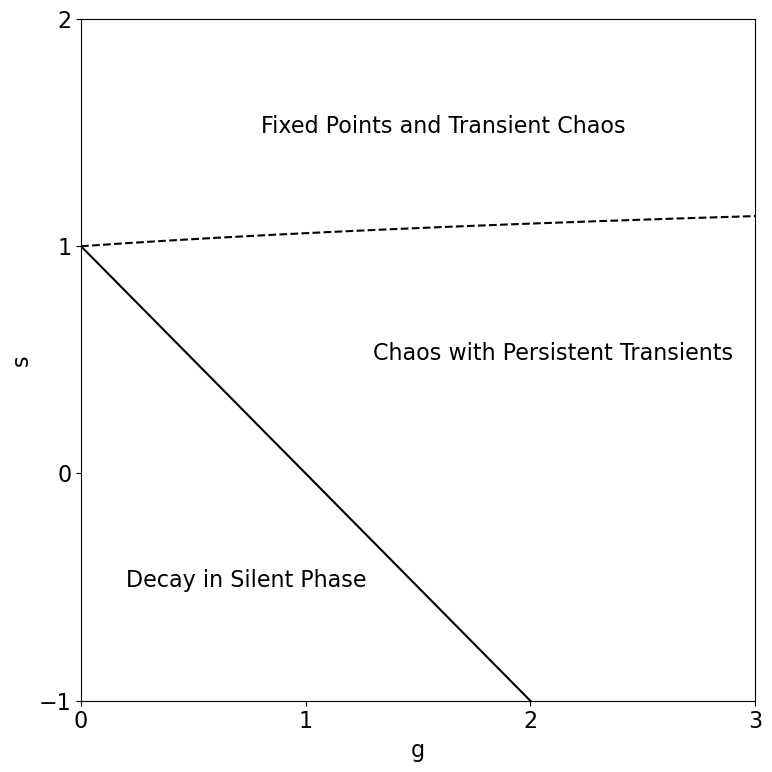

In [108]:
fig = plt.figure(figsize=(8, 8))
plt.plot(gs, s1, color = 'k')
plt.plot(gs, s2, color = 'k', linestyle='--')
plt.xlabel('g')
plt.ylabel('s')
plt.ylim(-1, 2)
plt.xlim(0, 3)
plt.xticks([0, 1, 2, 3])
plt.yticks([-1, 0, 1, 2])

plt.text(0.8, 1.5, 'Fixed Points and Transient Chaos')
plt.text(1.3, 0.5, 'Chaos with Persistent Transients')  
plt.text(0.2, -0.5, 'Decay in Silent Phase')

plt.savefig('final_results/theo_phase_diagram_s_const.png', bbox_inches='tight', pad_inches=0)

### Theoretical distribution P(s) = logN(0.6, 0.6)

In [4]:
ss = np.random.lognormal(0.6, 0.6, 10000)

In [7]:
x = np.linspace(0, 17, 1000)
y = 1/(x*np.sqrt(2*np.pi*0.6**2))*np.exp(-(np.log(x)-0.6)**2/(2*0.6**2))

/tmp/ipykernel_20665/2266960691.py:2: RuntimeWarning: divide by zero encountered in divide
  y = 1/(x*np.sqrt(2*np.pi*0.6**2))*np.exp(-(np.log(x)-0.6)**2/(2*0.6**2))
/tmp/ipykernel_20665/2266960691.py:2: RuntimeWarning: divide by zero encountered in log
  y = 1/(x*np.sqrt(2*np.pi*0.6**2))*np.exp(-(np.log(x)-0.6)**2/(2*0.6**2))
/tmp/ipykernel_20665/2266960691.py:2: RuntimeWarning: invalid value encountered in multiply
  y = 1/(x*np.sqrt(2*np.pi*0.6**2))*np.exp(-(np.log(x)-0.6)**2/(2*0.6**2))


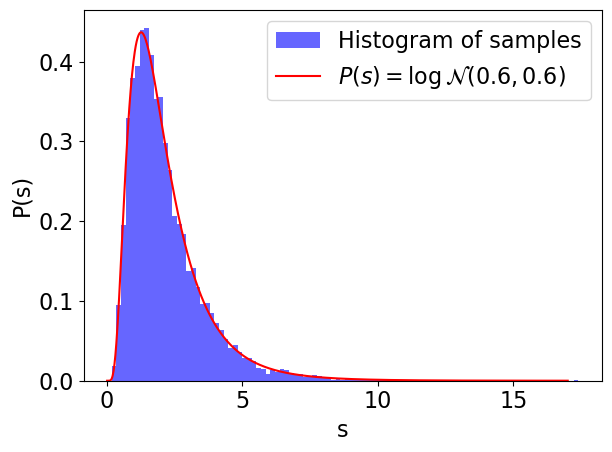

In [11]:
plt.hist(ss, bins = 100, density = True, color = 'blue', alpha = 0.6, label = 'Histogram of samples')
plt.plot(x, y, color = 'red', label = r'$P(s) = \log\mathcal{N}(0.6, 0.6)$')
plt.legend()
plt.xlabel('s')
plt.ylabel('P(s)')
plt.savefig('final_results/ex_lognormal_dist.png', pad_inches=0.1, bbox_inches='tight')